<a href="https://colab.research.google.com/github/AaayaB4/ADL/blob/Exercises/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Preprocess the data by reshaping and normalizing
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [ ]:
# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Define the CNN model function with an option for batch normalization
def create_model(use_batch_normalization=False):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
    if use_batch_normalization:
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64))
    if use_batch_normalization:
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [ ]:
# Create models with and without batch normalization
model_bn = create_model(use_batch_normalization=True)
model_no_bn = create_model(use_batch_normalization=False)


In [ ]:
# Compile the models
model_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_no_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the models and save the history
history_bn = model_bn.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)
history_no_bn = model_no_bn.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)

Epoch 1/10
1875/1875 - 56s - loss: 0.1395 - accuracy: 0.9617 - val_loss: 0.0777 - val_accuracy: 0.9772 - 56s/epoch - 30ms/step
Epoch 2/10
1875/1875 - 45s - loss: 0.0530 - accuracy: 0.9836 - val_loss: 0.0608 - val_accuracy: 0.9810 - 45s/epoch - 24ms/step
Epoch 3/10
1875/1875 - 46s - loss: 0.0358 - accuracy: 0.9893 - val_loss: 0.0483 - val_accuracy: 0.9848 - 46s/epoch - 24ms/step
Epoch 4/10
1875/1875 - 54s - loss: 0.0250 - accuracy: 0.9921 - val_loss: 0.0709 - val_accuracy: 0.9794 - 54s/epoch - 29ms/step
Epoch 5/10
1875/1875 - 45s - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0435 - val_accuracy: 0.9864 - 45s/epoch - 24ms/step
Epoch 6/10
1875/1875 - 46s - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.0509 - val_accuracy: 0.9858 - 46s/epoch - 25ms/step
Epoch 7/10
1875/1875 - 45s - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0610 - val_accuracy: 0.9832 - 45s/epoch - 24ms/step
Epoch 8/10
1875/1875 - 44s - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.0457 - val_accuracy: 0.9870 - 44s/ep

In [14]:
# Calculate classification error
classification_error_bn = 100 * (1 - np.array(history_bn.history['val_accuracy']))
classification_error_no_bn = 100 * (1 - np.array(history_no_bn.history['val_accuracy']))


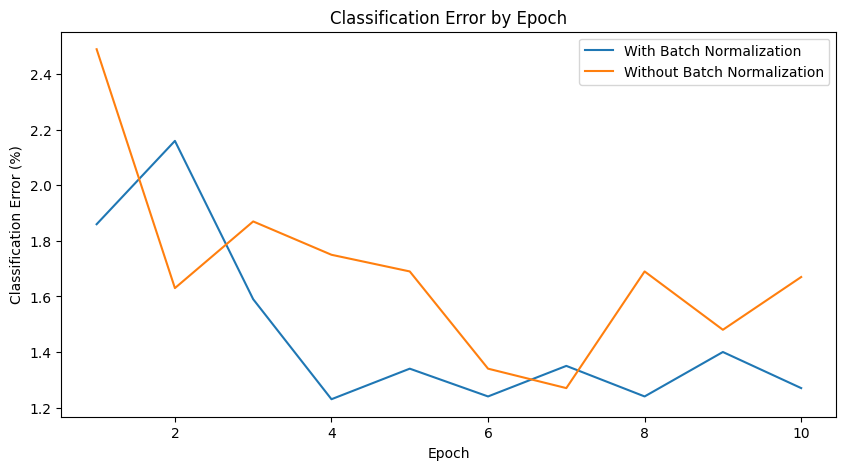

In [15]:
# Plot classification error by epoch
epochs = range(1, 11)
plt.figure(figsize=(10, 5))
plt.plot(epochs, classification_error_bn, label='With Batch Normalization')
plt.plot(epochs, classification_error_no_bn, label='Without Batch Normalization')
plt.xlabel('Epoch')
plt.ylabel('Classification Error (%)')
plt.title('Classification Error by Epoch')
plt.legend()
plt.show()

# **Summary and Analysis: **
**Initial Epochs:** The CNN with batch normalization starts with a higher error rate than the one without batch normalization. This could be due to the additional computation required to normalize batches, which may slightly delay the network's initial learning.

**Mid Training (Epochs 2-6):** The error rate for the CNN with batch normalization drops more rapidly than for the CNN without batch normalization. By the third epoch, the CNN with batch normalization achieves a lower error rate and continues to improve or maintain a lower error rate than the CNN without batch normalization for the next few epochs. This suggests that batch normalization helps the network to learn more effectively, likely by reducing internal covariate shift and helping the optimizer work in a more stable gradient landscape.

**Later Epochs (Epochs 7-10):** The trend in error rates becomes more erratic for both models, with some fluctuations in performance. Notably, the CNN without batch normalization exhibits a significant spike in error at epoch 8, which could indicate that it may be starting to overfit or is experiencing instability in gradient updates. On the other hand, the CNN with batch normalization shows a temporary increase in error at epoch 9 but then reduces again, which could suggest it's benefiting from the stabilizing effect of batch normalization.

**Overall Trend:** Throughout the training, the CNN with batch normalization consistently shows a trend toward lower classification errors compared to the CNN without batch normalization. This aligns with typical expectations, as batch normalization tends to improve training dynamics, allowing for faster convergence and sometimes better final performance.

In conclusion, batch normalization appears to be beneficial in training the CNN on the MNIST dataset, as evidenced by generally lower classification errors.